In [25]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from openpyxl import load_workbook
import datetime
import sys
from datetime import datetime
import matplotlib.pyplot as plt

In [26]:
infile = 'Missions depuis le début.xlsx'

df = pd.read_excel(infile)


In [36]:
df = df.iloc[:,0:5]
df

,Date,Recruteur,Client,Mission,Jours
0,2015-06-16,J. Hamilton,IBM,IBM,1
1,2015-06-18,J. Hamilton,IBM,IBM,1
2,2015-06-25,OCDE,OCDE,éco num,2
3,2015-08-11,Sémaphores,QVC,QVC,1
4,2015-08-16,Sémaphores,QVC,QVC,1
5,2015-08-22,Sémaphores,QVC,QVC,4
6,2015-08-25,Sémaphores,QVC,QVC,1
7,2015-08-31,Sémaphores,QVC,QVC,1
8,2015-09-04,Sémaphores,QVC,QVC,1
9,2015-09-12,Sémaphores,QVC,QVC,2


In [38]:
df_years = [i.year for i in df['Date']]
df_m = [i.month for i in df['Date']]
df_d = [i.day for i in df['Date']]
df_len = [int(i) if i!='annulé' else 0 for i in df['Jours']]



df['Assignment_Year'] = df_years
df['Assignment_Month'] = df_m
df['Assignment_Day'] = df_d
df['Length_In_Days'] = df_len

          Date          Recruteur           Client                   Mission  \
495 2019-01-10         Sémaphores              QVC                   DUP QVC   
496 2019-01-16  Gabriele Wennemer     Saint-Gobain              Saint-Gobain   
497 2019-01-19         Sémaphores              QVC                       QVC   
498 2019-01-20         Sémaphores              QVC                       QVC   
499 2019-01-21                MAE  Annick Girardin  Choose France Versailles   

    Jours  Assignment_Year  Assignment_Month  Assignment_Day  Length_In_Days  
495     1             2019                 1              10               1  
496     1             2019                 1              16               1  
497     1             2019                 1              19               1  
498     1             2019                 1              20               1  
499     1             2019                 1              21               1  
                Client  sum  Percentage
 9   

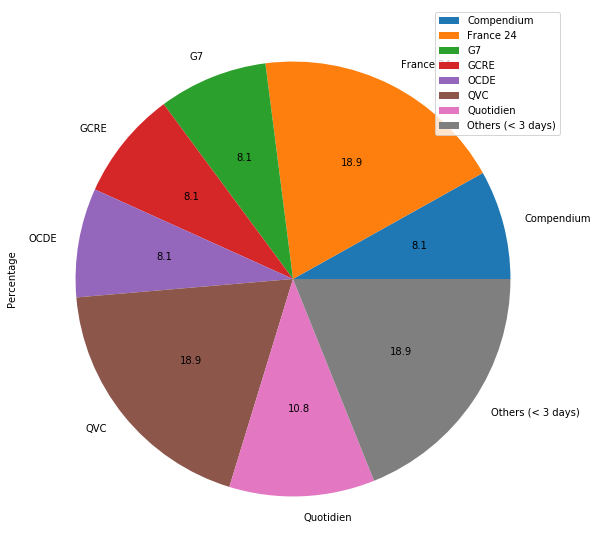

In [43]:



#print(df.head())



# Total amount by client: pie chart w/ total, percent
df2 = df[df.Assignment_Year==2019]
print(df2.head())
by_client = df2[['Client','Length_In_Days']].groupby('Client')['Length_In_Days'].agg([sum]).reset_index()

lower_l = 3

sum_other = sum([1 if x >= lower_l else 0 for x in by_client['sum']])
by_client = by_client[by_client['sum']>= lower_l]
by_client.loc[-1] = ['Others (< {} days)'.format(lower_l),sum_other]


by_client['Percentage'] = 100 * by_client['sum']  / by_client['sum'].sum()


print(by_client.sort_values('Percentage',ascending=False))


by_client.plot(kind='pie',y="Percentage", autopct='%.1f',labels=by_client['Client'],figsize=(15, 10))

df.to_excel('Tom_assignment_history.xlsx',index=False)

ALTO                 12
Sémaphores           11
MAE                   7
OCDE                  3
Lapsus Lingae         3
Claudine Pierson      3
Rugby Europe          2
Gabriele Wennemer     2
CEAC                  1
Michel Zlotowski      1
Voices                1
BCIC                  1
Name: Recruteur, dtype: int64
             Recruteur  sum  Percentage
 0                ALTO   12   22.641509
 10         Sémaphores   11   20.754717
 6                 MAE    8   15.094340
-1   Others (< 3 days)    8   15.094340
 3    Claudine Pierson    6   11.320755
 8                OCDE    5    9.433962
 5       Lapsus Lingae    3    5.660377


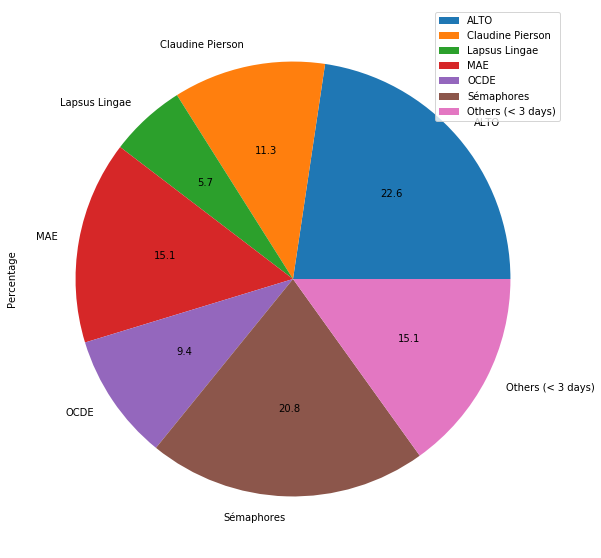

In [42]:
df2 = df[df.Assignment_Year==2019]
print(df2.Recruteur.value_counts())
by_req = df2[['Recruteur','Length_In_Days']].groupby('Recruteur')['Length_In_Days'].agg([sum]).reset_index()
#print(by_req)
lower_l = 3
sum_other = sum([1 if x >=lower_l else 0 for x in by_client['sum']])
by_req = by_req[by_req['sum']>=lower_l]
by_req.loc[-1] = ['Others (< {} days)'.format(lower_l),sum_other]


by_req['Percentage'] = 100 * by_req['sum']  / by_req['sum'].sum()


print(by_req.sort_values('Percentage',ascending=False))


by_req.plot(kind='pie',y="Percentage", autopct='%.1f',labels=by_req['Recruteur'],figsize=(15, 10))


In [14]:
print(df['Year'][0]==str(datetime.now().year))

False


In [19]:
import numpy as np


## annual analysis

df2 = df[ df['Year']!=datetime.now().year ]
#print(df2)

annual_days = df[['Year','Count']].groupby('Year')['Count'].agg([sum]).reset_index()

annual_client = df2[['Client','Count']].groupby('Client')['Count'].agg(sum).reset_index()
sum_other = sum([1 if x >=5 else 0 for x in annual_client['Count']])
annual_client = annual_client[annual_client['Count']>=5]
annual_client.loc[-1] = ['Others (< 5 days)',sum_other]

print(annual_days.to_string(index=False))
print(annual_client.sort_values('Count',ascending=False).to_string(index=False))
print()

# monthly excluding this month

df3 = df[(df['Year']!=datetime.now().year) & (df['M']!=datetime.now().month)]

monthly = df3[['M','Count']].groupby('M')['Count'].agg('sum').reset_index()

#get average by month
temp = df3[['Year','M','Count']].groupby(['Year','M']).sum().reset_index().groupby('M').mean().reset_index()
monthly['Avg Days'] = round(temp['Count'],2)


d = {1:'Jan',2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

monthly['M'] = monthly.M.map(d)
monthly = monthly.rename(columns={'Count': 'Total Days', 'M':'Month'})


#print()
print(monthly.to_string(index=False))

Year  sum
2015   81
2016  189
2017  158
2018  172
2019    9
Client  Count
       Sémaphores    303
             ALTO    122
             BCIC     38
             OCDE     32
     Quai d'Orsay     20
           UNESCO     18
Others (< 5 days)     11
         Sémantis     10
              COE      9
Gabriele Wennemer      6
             ASCO      5
           Voices      5

Month  Total Days  Avg Days
 Jan          35      8.75
 Mar          41     13.67
 Apr          42     14.00
 May          44     14.67
 Jun          60     15.00
 Jul          33     11.00
 Aug          46     11.50
 Sep          56     14.00
 Oct          82     20.50
 Nov          86     21.50
 Dec          45     11.25


In [15]:
infile = 'Comptabilité.xlsx'
#filepath = os.path.abspath(os.path.join(os.getcwd(),"../../.."))
#file = os.path.join(filepath, infile)
#filepath = os.path.abspath(os.pardir)
#file = os.path.join(filepath, filename)
#print(file)

d = {1:'Jan',2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

xl = load_workbook(infile, data_only=True)
sheet_names = xl.sheetnames
#print(sheet_names)
#sheet = xl.worksheets[0]

res = []


#iterate by rows
for i in sheet_names:
    sheet = xl[i]
    #iterate by rows
    for row in sheet.iter_rows(min_row=2, min_col=1, max_col=6):
        temp = [cell.value for cell in row]
        temp.append(i)
        if pd.isna(temp[0]):
            break
        else:
            res.append(temp)
    


#headers = res.pop(0)
headers = ['N° facture', 'Client', 'HT', 'Frais', 'Total HT', 'TVA','Date Received']
df_new = pd.DataFrame(res, columns=headers)


def year_paid(s):
    return(s[len(s)-2:])

def parse_n_fac(nfac):
    n = str(nfac)
    #print(n)
    year = '20'+n[0:2]
    month = n[2:4]
    #day = n[4:]
    #print(year)
    return(year,int(month))

t1 = [parse_n_fac(a) for a in df_new['N° facture']]
year,month = zip(*t1)

df_new['Year Received'] = [year_paid(a) for a in df_new['Date Received']]
df_new['Year Invoiced'] = year
df_new['Month Invoiced'] = month
df_new['Month Invoiced'] = df_new['Month Invoiced'].map(d)
#monthly['M'] = monthly.M.map(d)


In [16]:
#print(df_new)
df_new.head()
#temp = 'Jan. 16'
#print(temp[len(temp)-2:])

,N° facture,Client,HT,Frais,Total HT,TVA,Date Received,Year Received,Year Invoiced,Month Invoiced
0,150904,Sémaphores,570.0,98.00,668.00,133.6,Jan. 16,16,2015,Sep
1,150906,Sémaphores,1140.0,90.00,1230.00,246,Jan. 16,16,2015,Sep
2,150907,Sémaphores,1140.0,74.00,1214.00,242.8,Jan. 16,16,2015,Sep
3,151002,Sémaphores,1140.0,101.19,1241.19,248.238,Jan. 16,16,2015,Oct
4,151006,Sémaphores,1140.0,32.64,1172.64,234.528,Jan. 16,16,2015,Oct


In [18]:
import numpy as np

# Global stats
# Total amount by client: pie chart w/ total, percent
total_client = df_new[['Client','Total HT']].groupby('Client')['Total HT'].agg([sum]).reset_index()
#print(total_client)
total_client['Percentage'] = 100 * total_client['sum']  / total_client['sum'].sum()
#print(total_client)

print(total_client.sort_values('Percentage',ascending=False))


# Total # days per each month: Jan 15, Jan 16,...
# Total amount per each month: Feb 15, Feb 16,...





### monthly analysis
# monthly invoiced amount
monthly_inv = df_new[['Date Received','Total HT']].groupby('Date Received')['Total HT'].agg( [sum,np.mean]).reset_index()

#monthly received amount
monthly_rec = df_new[['Date Received','Total HT']].groupby('Date Received')['Total HT'].agg( [sum,np.mean]).reset_index()




#print(monthly)
# annual

#annual = df_new[['Year Invoiced','Total HT']].groupby('Year Invoiced').agg({"Total HT": [sum, np.mean]})
#print(annual)
print()


### annual received amount


### annual invoiced amount


                 Client        sum  Percentage
30           Sémaphores  174437.72   38.120254
0                  ALTO  145691.88   31.838363
3                  BCIC   18177.60    3.972390
17                 OCDE   14924.40    3.261462
29             Suprédac   12747.44    2.785726
21                 Quai   12591.34    2.751613
2                  ASCO    8209.34    1.794005
14       Lapsus Linguae    7471.32    1.632724
18                 OSKA    6541.43    1.429513
27             Semantis    6092.04    1.331307
22         Quai d'Orsay    5689.69    1.243380
20       Petite Friture    5233.32    1.143649
26         Saint-Gobain    5100.00    1.114514
24         Rugby Europe    5050.00    1.103587
15                  MAE    4222.13    0.922671
7           Claudine P.    4000.00    0.874129
36               Voices    2200.00    0.480771
5                  CSDR    1950.00    0.426138
4                 Bower    1600.00    0.349651
16  Ministère outre-mer    1589.66    0.347392
9          Fo

In [19]:
df_new['Year Invoiced'].unique()
print(df_new[df_new['Year Invoiced']=='2015'])

   N° facture      Client       HT   Frais  Total HT      TVA Date Received  \
0      150904  Sémaphores   570.00   98.00    668.00    133.6       Jan. 16   
1      150906  Sémaphores  1140.00   90.00   1230.00      246       Jan. 16   
2      150907  Sémaphores  1140.00   74.00   1214.00    242.8       Jan. 16   
3      151002  Sémaphores  1140.00  101.19   1241.19  248.238       Jan. 16   
4      151006  Sémaphores  1140.00   32.64   1172.64  234.528       Jan. 16   
5      151105        OCDE  1704.46    0.00   1704.46  340.892       Jan. 16   
6      151108    Suprédac   416.25    0.00    416.25    83.25       Jan. 16   
7      151007  Sémaphores   570.00   19.18    589.18  117.836       Jan. 16   
8      151008  Sémaphores   570.00   50.91    620.91  124.182       Jan. 16   
9      151010  Sémaphores  1140.00   58.07   1198.07  239.614       Jan. 16   
10     151203  Sémaphores   570.00   24.50    594.50    118.9       Jan. 16   
11     151204  Sémaphores   540.00   26.54    566.54

           Jan       Feb       Mar       Apr       May       Jun       Jul  \
2015      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2016  16924.79  10191.25  10335.54   6231.84   9901.75  11096.98  10875.68   
2017   8662.69   5160.91   4510.27   7569.34  10804.58  10095.66   4336.50   
2018  10425.50   7816.98   8437.82  15884.72  12208.80   9904.02  13696.52   
2019   6047.96  11183.67   7907.31   8779.87  10269.44   6306.45   6020.95   

           Aug       Sep       Oct       Nov       Dec  
2015      0.00   3112.00   4821.99   8229.38   2872.85  
2016   9090.18  11394.84  13266.33  13725.89  13697.15  
2017   8324.75  11780.29  16343.31   6561.44  12589.43  
2018  11629.70   9479.30  10833.78  15181.49  13076.64  
2019      0.00      0.00      0.00      0.00      0.00  
      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2015    0    0    0    0    0    0    0    0    3    5    6    5
2016   13   15   16   10   12   16   16   10   19   14   23

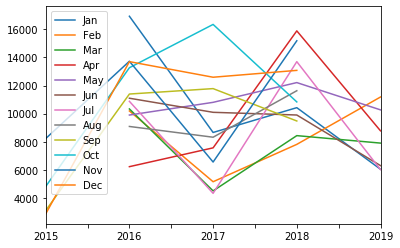

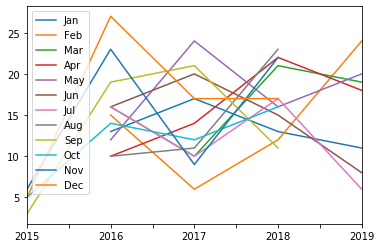

In [21]:
#temp = 'Janvier 2019'
#temp[-3:-1]


# make a table of 
# jan feb mar.... dec
# 2015
# 2016

column_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


def get_monthly_results(data,month,f):
    res=[]
    temp = data[data['Month Invoiced'] == month]
    #print(temp)
    for year in data['Year Invoiced'].unique():
        #print(year)
        temp2 = temp[temp['Year Invoiced'] == year]
        #print(temp2)
        total = f(temp2['Total HT'])
        res.append(total)
    return(res)

#test = get_monthly_results(df_new, 'Jan',sum)
#print(test)

# amount data by month

nb_years = len(df_new['Year Invoiced'].unique())
matrix = np.ones((nb_years, 12))
for i in range(len(column_names)):
    temp = get_monthly_results(df_new,column_names[i],sum)
    #print(temp)
    matrix[:,i] = temp
#print(matrix.flatten())

column_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
row_names = [str(a) for a in df_new['Year Invoiced'].unique()]
df_amount = pd.DataFrame(matrix, index=row_names,columns=column_names)

print(df_amount)
df_amount.replace(0, np.nan).plot()

# number of days by month
b_years = len(df_new['Year Invoiced'].unique())
matrix = np.ones((nb_years, 12))

for i in range(len(column_names)):
    temp = get_monthly_results(df_new,column_names[i],np.count_nonzero)
    #print(temp)
    matrix[:,i] = temp
#print(matrix)

column_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
row_names = [str(a) for a in df_new['Year Invoiced'].unique()]
df_nb = pd.DataFrame(matrix, index=row_names,columns=column_names)

print(df_nb.astype('int'))
df_nb.replace(0, np.nan).plot()


In [89]:
len(df_new['Year Invoiced'].unique())
print(df_amount)

           Jan       Feb       Mar       Apr       May       Jun       Jul  \
2015      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2016  16924.79  10191.25  10335.54   6231.84   9901.75  11096.98  10875.68   
2017   8662.69   5160.91   4510.27   7569.34  10804.58  10095.66   4336.50   
2018  10425.50   7816.98   8437.82  15884.72  11478.80   9904.02  13696.52   
2019   1389.20      0.00      0.00      0.00      0.00      0.00      0.00   

           Aug       Sep       Oct       Nov       Dec  
2015      0.00   3112.00   4821.99   8229.38   2872.85  
2016   9090.18  11394.84  13266.33  13725.89  13697.15  
2017   8324.75  11780.29  16343.31   6561.44  12589.43  
2018  11629.70   9479.30  10833.78  15181.49   4566.50  
2019      0.00      0.00      0.00      0.00      0.00  


In [95]:
df_new[(df_new['Year Invoiced']=='2015') & (df_new['Month Invoiced']=='Oct')]

,N° facture,Client,HT,Frais,Total HT,TVA,Date Received,Year Received,Year Invoiced,Month Invoiced
3,151002,Sémaphores,1140.0,101.19,1241.19,248.238,Jan. 16,16,2015,Oct
4,151006,Sémaphores,1140.0,32.64,1172.64,234.528,Jan. 16,16,2015,Oct
7,151007,Sémaphores,570.0,19.18,589.18,117.836,Jan. 16,16,2015,Oct
8,151008,Sémaphores,570.0,50.91,620.91,124.182,Jan. 16,16,2015,Oct
9,151010,Sémaphores,1140.0,58.07,1198.07,239.614,Jan. 16,16,2015,Oct


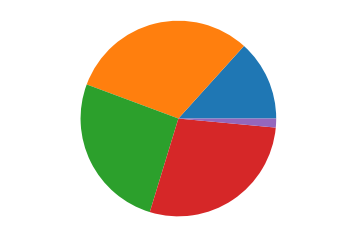

   sum
0   81
1  189
2  158
3  172
4    9


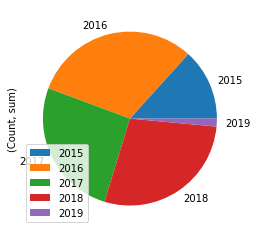

In [27]:

 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(annual['Count'])
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


df[['Y','M','Count']].groupby('Y').agg({"Count": [sum]}).plot.pie(subplots=True)

print(annual['Count'])
#for title, group in annual:
#    print(title)